<a href="https://colab.research.google.com/github/qiuguangting/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#資料預處理

In [425]:
import tensorflow as tf

In [426]:
tf.__version__

'2.18.0'

In [427]:
from tensorflow.keras import utils
import numpy as np

In [428]:
from tensorflow.keras.datasets import fashion_mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= fashion_mnist.load_data()

In [429]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [430]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [431]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [432]:
print("訓練資料形狀:", x_Train.shape)
print("測試資料形狀:", x_Test.shape)

訓練資料形狀: (60000, 784)
測試資料形狀: (10000, 784)


##訓練資料(圖片)

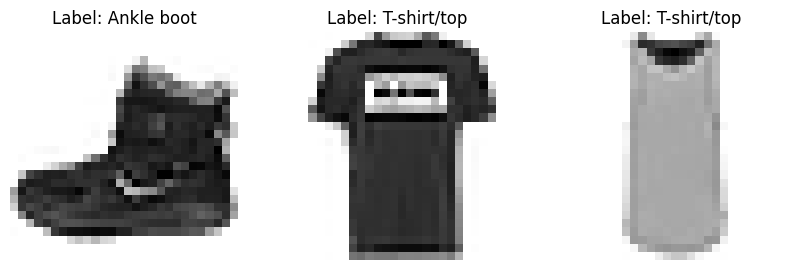

In [433]:
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i], cmap='binary')
    plt.title(f"Label: {class_names[y_train[i]]}")
    plt.axis('off')
plt.show()

#建立模型

In [434]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [435]:
model = Sequential()

##輸入層

In [461]:
model.add(Dense(units=700,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##防止 overfitting

In [437]:
model.add(Dropout(0.3))

##第一隱藏層

In [438]:
model.add(Dense(units=2000,
                kernel_initializer='normal',
                activation='relu'))

In [439]:
model.add(Dropout(0.3))

##輸出層

In [440]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

#檢視建置的神經網路

In [441]:
print(model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2000)                │       1,402,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │          20,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,971,510 (7.52 MB)

 Trainable params: 1,971,510 (7.52 MB)

 Non-trainable params: 0 (0.00 B)

None


#訓練模型

In [442]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [443]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=80, batch_size=200,verbose=2)

Epoch 1/80
240/240 - 20s - 83ms/step - accuracy: 0.7989 - loss: 0.5688 - val_accuracy: 0.8498 - val_loss: 0.4065
Epoch 2/80
240/240 - 18s - 73ms/step - accuracy: 0.8502 - loss: 0.4127 - val_accuracy: 0.8644 - val_loss: 0.3827
Epoch 3/80
240/240 - 20s - 82ms/step - accuracy: 0.8622 - loss: 0.3789 - val_accuracy: 0.8715 - val_loss: 0.3590
Epoch 4/80
240/240 - 23s - 94ms/step - accuracy: 0.8706 - loss: 0.3491 - val_accuracy: 0.8723 - val_loss: 0.3514
Epoch 5/80
240/240 - 17s - 71ms/step - accuracy: 0.8758 - loss: 0.3337 - val_accuracy: 0.8837 - val_loss: 0.3233
Epoch 6/80
240/240 - 20s - 84ms/step - accuracy: 0.8811 - loss: 0.3182 - val_accuracy: 0.8802 - val_loss: 0.3268
Epoch 7/80
240/240 - 21s - 86ms/step - accuracy: 0.8854 - loss: 0.3124 - val_accuracy: 0.8844 - val_loss: 0.3224
Epoch 8/80
240/240 - 21s - 86ms/step - accuracy: 0.8893 - loss: 0.2983 - val_accuracy: 0.8822 - val_loss: 0.3319
Epoch 9/80
240/240 - 20s - 85ms/step - accuracy: 0.8924 - loss: 0.2895 - val_accuracy: 0.8885 - 

#以圖形顯示訓練過程

In [444]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

##準確率、驗證準確率

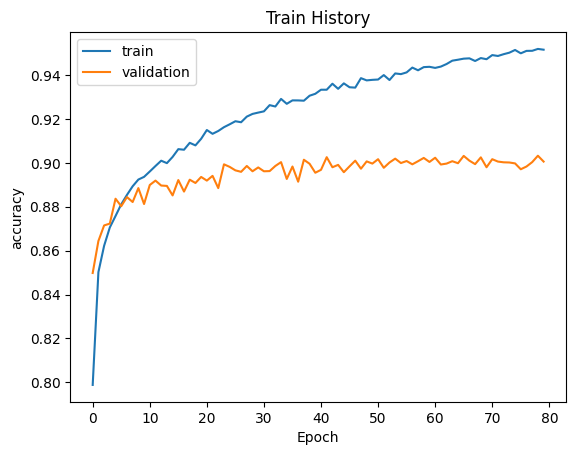

In [445]:
show_train_history(train_history,'accuracy','val_accuracy')

##損失值、驗證損失值

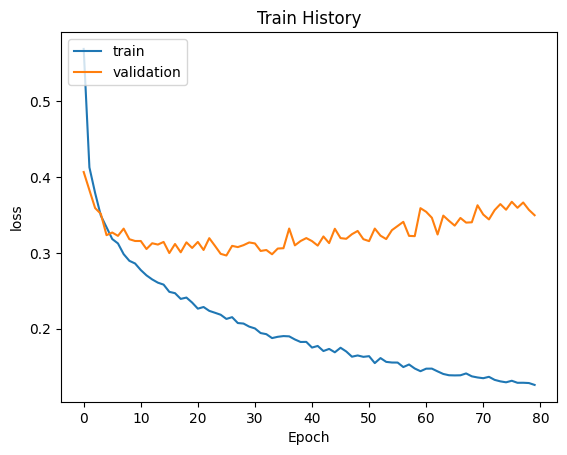

In [446]:
show_train_history(train_history,'loss','val_loss')

#評估模型準確率

In [447]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8961 - loss: 0.3994

accuracy= 0.8963000178337097


#進行預測

In [448]:
prediction=model.predict(x_Test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [449]:
prediction.shape

(10000, 10)

In [450]:
prediction

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [451]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    class_names = ['T-shirt/top(T恤)', 'Trouser(褲子)', 'Pullover(套衫)', 'Dress(裙子)', 'Coat(外套)',
                   'Sandal(涼鞋)', 'Shirt(汗衫)', 'Sneaker(運動鞋)', 'Bag(包)', 'Ankle boot(踝靴)']
    fig = plt.gcf()
    fig.set_size_inches(12, 14)

    if num > 25:
        num = 25

    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        label_name = class_names[labels[idx]]
        predicted_name = class_names[np.argmax(prediction[idx])]
        ax.set_title(f"label={label_name}, \npredict={predicted_name}", fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()


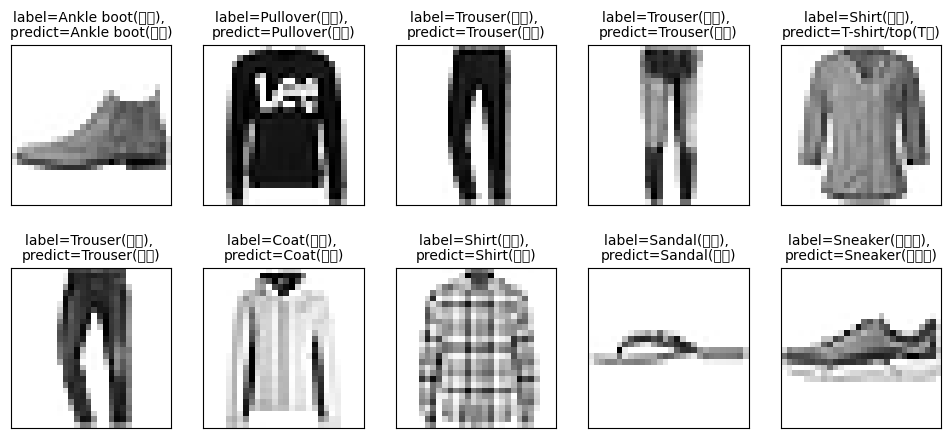

In [463]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=0, num=10)

#混淆矩陣

In [453]:
import pandas as pd
predicted_labels = np.argmax(prediction, axis=1)

pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,910,7,7,8,6,1,60,0,1,0
1,1,991,0,4,2,0,1,0,1,0
2,34,4,774,7,133,1,46,0,1,0
3,32,23,7,863,53,0,16,0,6,0
4,4,1,64,18,891,0,21,0,1,0
5,0,0,0,0,0,978,0,7,2,13
6,203,4,75,19,166,0,528,0,5,0
7,0,0,0,0,0,33,0,921,0,46
8,13,1,0,3,2,2,5,2,972,0


In [454]:
df = pd.DataFrame({'label':y_test_label, 'predict':predicted_labels})
df[:15]

,label,predict
0,9,9
1,2,2
2,1,1
3,1,1
4,6,0
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


In [455]:
df[(df.label==5)&(df.predict==3)]

,label,predict


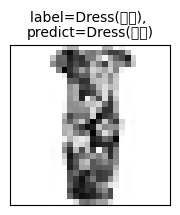

In [464]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=100,num=1)

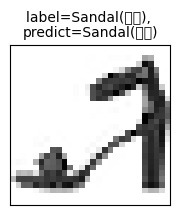

In [465]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

#儲存完整模型


In [458]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [459]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [460]:
model.save('hw3.keras')